# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Israel Suarez Robles

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [10]:
# TODO: Import dataset and inspect the first five columns
seeds_data = pd.read_csv('seeds_dataset.txt', sep='\s+', header=None)
column_names = ["area", "perimeter", "compactness", "kernel_length", "kernel_width", "asymmetry_coeff", "kernel_groove_length", "wheat_type"]
seeds_data.columns = column_names
seeds_data.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_length,wheat_type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [11]:
seeds_data['wheat_type'].unique()

array([1, 2, 3])

Next, you will need to separate the data into your feature matrix and target vector.

In [12]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
X = seeds_data[column_names[:-1]]
y = seeds_data['wheat_type']
print(X.shape, y.shape)

(210, 7) (210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)*

Standard Scaler is the best choice because first it centers each feature by substracing its mean and second it scales each feature by diving by its standar deviation. Both steps are important because centering the data ensures that PCA is not misled by the mean of the features rather than the underlying structure of the data. And this way of scaling standardizes the variance accross all features ensuring each features contributes equally when computing the principal components.

And although other scalers also scale the data (for example MinMax scaler) to a common scale (0 to 1) it doesn't center tha data does not make the standard deviation to be one (standardize the variance) thus some features will have a larger influence when calculating the principal components, which is not what we want.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [13]:
# TODO: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
# TODO: Print the shape of the training feature matrix and target vector
print(X_train.shape, y_train.shape)

(157, 7) (157,)


Now that we have our training data, we can implement our selected scaler.

In [15]:
# TODO: Scale the data
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [16]:
# TODO: Instantiate model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [17]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [18]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(lr, param_grid, cv=5).fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy Score: {grid_search.best_score_:.2f}")
print(f"Test Accuracy {grid_search.score(X_test_scaled, y_test):.2f}")

Best Parameters: {'C': 10.0, 'fit_intercept': True}
Best Cross-Validation Accuracy Score: 0.94
Test Accuracy 0.96


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [19]:
# TODO: Predict y labels using best estimator
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

In [20]:
# TODO: Reduce dimensions of test data for plotting
from sklearn.decomposition import PCA

pca = PCA(2)  # project from 7 to 2 dimensions
X_test_projected = pca.fit_transform(X_test_scaled)
print(X_test_scaled.data.shape)
print(X_test_projected.shape)

(53, 7)
(53, 2)


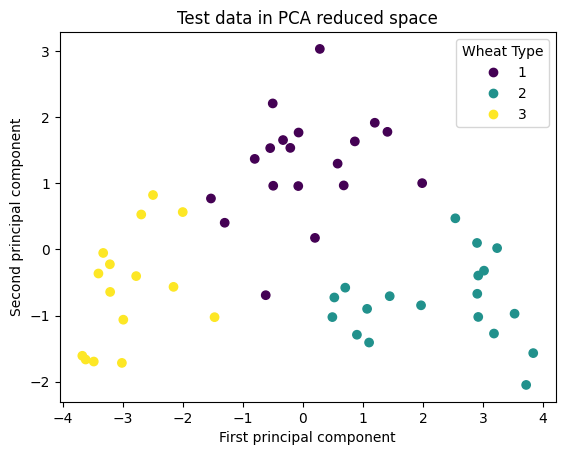

In [21]:
# TODO: Plot test points colored by predicted label
scatter = plt.scatter(X_test_projected[:, 0],
            X_test_projected[:, 1],
            c=y_pred)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Test data in PCA reduced space')
plt.legend(handles=scatter.legend_elements()[0],
           title="Wheat Type",
           labels=set(y_pred))  # Set ensures unique labels
plt.show()

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

1) Because of both the cross-validation accuracy score (0.94) and test accuracy score (0.96) are high and mean that the model generalizes well on unseen data I conclude that linear regression worked well in this dataset.

2) I think PCA also worked well because in the graph above we can see that:
* a high value in the pc2 along with values around 0 for pc1 is related to wheat type 1
* a low value for both pc1 and pc2 is related to wheat type 3
* a high value of pc1 but low value of pc2 is related to wheat type 2

which demonstrates a clear separation among the classes that the 2 principal components are able to capture.


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

1. I sourced my code mainly from the PCA Applications notebook in d2l, and my previous assigment 4. But I also guided myself by following the video StatQuest: PCA in Python in youtube and some code from chatgpt to add the wheat type legends to the scatter plot.
1. First I completed all the code sections in the same order it was presented. Then I answered each question. Altough in step 2 I initialy selected Standart scaler just because that's the one the notebooks uses. I later researched if this was the correct scaler or not.
1. Yes I used chatgpt twice, once to help me read the txt file and second to help me apply the wheat type legends to the scatter plot. My prompts where how to read a .txt file and how to add class labels to a scatter plot. And yes I had to modified the code in both occations to make it work with this exercise.
1. Yes I did have challenges understanding PCA when I first read through the assigment. But I read the slide and watched StatQuest so I was able to make part 1 of the assigmnent and it wasn't that hard after all. I think I do understand PCA now for the most part.

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed).

In [22]:
# TODO: Scale feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

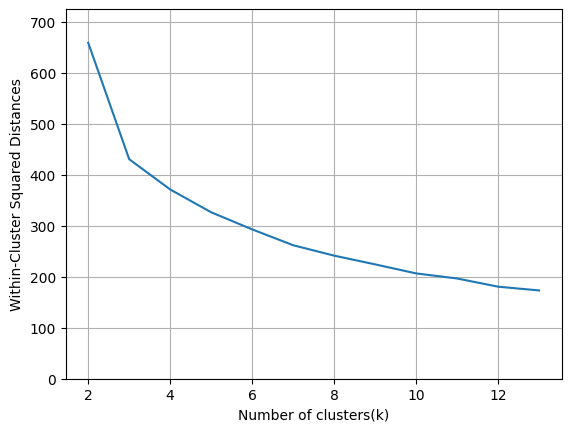

In [23]:
# TODO: Use the elbow method to determine the optimal number of clusters
from sklearn.cluster import KMeans

inertia = []
for n_clusters in range(2, 14):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10).fit(X_scaled)
    inertia.append(kmeans.inertia_ )

inertias = pd.DataFrame({'n_clusters': range(2, 14), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
plt.grid(True)
ax.legend().set_visible(False)

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [24]:
# TODO: Implement K-means with the number of clusters determined in the previous step
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [32]:
# TODO: Calculate the three different validation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

cluster_labels = kmeans.labels_

silhouette = silhouette_score(X_scaled, cluster_labels)
calinski = calinski_harabasz_score(X_scaled, cluster_labels)
davies = davies_bouldin_score(X_scaled, cluster_labels)

Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

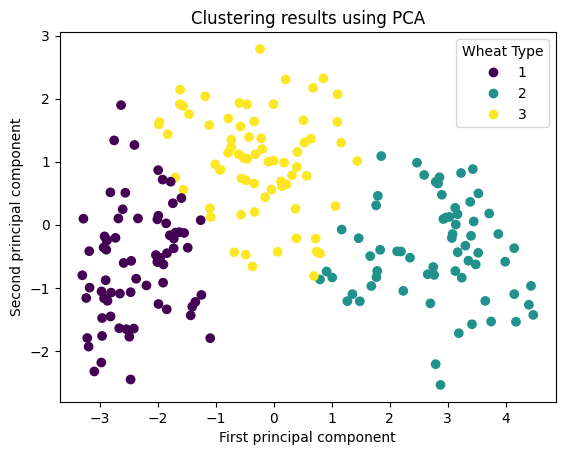

In [37]:
# TODO: Plot clustering results
pca = PCA(2)
X_projected = pca.fit_transform(X_scaled)

scatter = plt.scatter(X_projected[:, 0],
            X_projected[:, 1],
            c=cluster_labels)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Clustering results using PCA')
plt.legend(handles=scatter.legend_elements()[0],
           title="Wheat Type",
           labels=set(cluster_labels+1))  # Set ensures unique labels, +1 ensures types are from 1 to 3
plt.show()

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [43]:
# TODO: Find the number of principal components using explained variance ratio
pca = PCA().fit(X_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.where(explained_variance >= 0.95)[0][0] + 1
print(f"Number of principal components to explain 95% variance: {n_components}")

Number of principal components to explain 95% variance: 3


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [44]:
# TODO: Use PCA to transform the data
pca = PCA(n_components)
X_pca = pca.fit_transform(X_scaled)
print(f"Transformed shape of X after PCA: {X_pca.shape}")

Transformed shape of X after PCA: (210, 3)


In [40]:
# TODO: Implement K-means with the transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=0)
kmeans_pca.fit(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [41]:
# TODO: Calculate the three different validation metrics
silhouette_pca = silhouette_score(X_pca, kmeans_pca.labels_)
calinski_pca = calinski_harabasz_score(X_pca, kmeans_pca.labels_)
davies_pca = davies_bouldin_score(X_pca, kmeans_pca.labels_)

### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [42]:
# TODO: Display results
results_df = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'],
    'Original Data': [silhouette, calinski, davies],
    'PCA Transformed Data': [silhouette_pca, calinski_pca, davies_pca]
})

results_df

,Metric,Original Data,PCA Transformed Data
0,Silhouette Score,0.400727,0.410082
1,Calinski-Harabasz Score,249.784175,260.288507
2,Davies-Bouldin Score,0.927871,0.903069


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


1) Yes, by using the elbow method we identified 3 as the number of optimal clusting, which in fact alings precesily with 3 clasees that we have in the labeled dataset.

2) In both plots (using lr or using clustering) we can observe 3 separable classes/clusters. The shape of the clusters is also similar between the two plots. However the plot we get from using clustering starts to overlap at the edges of the clusters. I think this results are expected as with lr we have the labels and thus we can expect a better class separation. But this shows that clustering can be a powerful tool with certain datasets.

3) I used two components and thus a 2D plot. The first principal component x-axis and second principal component y-axis. Yes it improved the results because for both the silhoute and calisnki a higher score is better. Wheareas for DB a score closer to zero is better. However determining how much is the difference by just looking at the numbers is hard to tell. At least that is what I can recall according to the lectures and it is more based on the context. But please correct me if I got it wrong.



### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

1) I sourced my code from the the finding K, Kmeans examples and NFL clustering notebooks.

2) I completed every step and question in the order they were presented.

3) I used chat gpt to give me code to calculate the number of components using explained variance ratio as I cound't find that code in the notebooks or maybe i just didn't see it. Yes I modified the code but just to change it to actual name of my variables.

4) Although I find the concept of clustering easier than the concept of PCA. For me part 2 of this assigment was more difficult. And I got confused about why we would want to apply pca before clustering. But I understand now the difference between using PCA for visualization versus using PCA for dimensionality reduction.

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.

I liked that we learnt how we can visualize data with many features (dimensions) in a 2D graph by using two principal components. And I like that we were able to compare hand by hand lr with k-means and obtain similar results. Although I understand there are many cases k-means won't be as effective.

Thank you for all the assigments. I liked all of them. They were all very interesting and challenging at times.